In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysills
import csv

In [2]:
counter = 0
counter_ppm = 0
keyword_comp = "COMPOSITIONAL ANALYSIS"
keyword_ppm = "(ppm)"
helper_index = {"COMPOSITIONAL ANALYSIS": [], "(ppm)": []}

with open("Results_FI.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    for index, line in enumerate(csv_reader):
        if keyword_comp in line:
            counter += 1
            helper_index[keyword_comp].append(index)
        if keyword_ppm in line:
            counter_ppm += 1
            helper_index[keyword_ppm].append(index)

#print("The keyword", keyword_comp, "was found", counter, "times.")
#print("Row index:", helper_index[keyword_comp])
#print("")

#print("The keyword", keyword_ppm, "was found", counter_ppm, "times.")
#print("Row index:", helper_index[keyword_ppm])
#print("")

n_files_smpl = helper_index[keyword_ppm][1] - helper_index[keyword_ppm][0] - 4
#print("Number of sample files:", n_files_smpl)

In [3]:
index_start = helper_index[keyword_comp][0] + 3
index_end = helper_index[keyword_comp][0] + 3 + n_files_smpl + 2
list_indices = np.arange(index_start, index_end)

df_smpl_incl = pd.read_csv("Results_FI.csv", skiprows = lambda x: x not in list_indices, delimiter=";")
list_isotopes = list(df_smpl_incl.keys())[2:]

df_smpl_incl

,filename,ID,Li7,B11,Na23,Mg24,Mg25,Al27,Si29,P31,...,Cu63,Br81,Rb85,Sr88,I127,Cs133,Ba137,Au197,Th232,U238
0,24_01_29_a09.csv,A,20.16317,48.54534,6088.68541,-0.00000,-0.00000,-0.22510,352.44370,-0.00000,...,9.10631,-0.00000,121.26044,105.27899,-2.02884,19.56143,386.42368,-0.00000,19.28243,-0.00000
1,24_01_29_a10.csv,A,186.10834,92.74711,23678.43468,826.15174,1452.14843,-0.00000,-0.00000,88026.88992,...,-0.00000,227.23343,88.42738,-0.00000,-4.47236,17.92255,391.93265,2.00396,88.94874,20.17315
2,24_01_29_a11.csv,A,-10.34925,131.03669,25790.24901,232.49832,-0.00000,-0.00000,-0.00000,-0.00000,...,33.42685,-0.00000,128.53159,313.53119,-0.00000,21.71810,295.09146,-0.00000,-0.00000,11.07736
3,24_01_29_a13.csv,A,49.63184,52.47792,-0.00000,-0.00000,-1.22265,-0.00000,-115.83058,-0.00000,...,3.93957,-5.92901,57.67338,269.85816,2.36805,25.76314,189.57867,-0.00000,-0.00000,-0.05709
4,24_01_29_a15.csv,A,-0.00000,311.63107,3264.34532,7.10150,-0.00000,-0.00000,-0.00000,-0.00000,...,65.13507,198.31688,72.58358,-0.00000,83.30138,22.06432,122.89734,37.04610,-0.00000,-0.00000
5,24_01_29_a16.csv,A,67.27629,158.83800,20513.59300,1014.28508,1003.65522,-0.55818,-0.00000,166220.69970,...,765.96765,-0.00000,177.98588,146.61438,-2.23006,50.32433,2635.48584,-0.00000,79.72227,2.49599
6,24_01_29_a19.csv,A,67.32285,26.53308,6749.50737,-0.00000,-0.00000,-0.00000,-0.00000,47930.82343,...,18.73058,-24.22244,115.53987,252.48871,-3.21307,20.67585,799.72002,-0.31687,42.71304,1.29086


In [4]:
print("Measured isotopes:", list_isotopes)

molar_mass_cl = 35.45
molar_mass_br = 79.904
molar_mass_i = 126.90
conversion_cl = 1/(molar_mass_cl)
conversion_br = 1/(molar_mass_br)
conversion_i = 1/(molar_mass_i)

data_cl = conversion_cl*df_smpl_incl["Cl35"]
data_br = conversion_br*df_smpl_incl["Br81"]
data_i = conversion_i*df_smpl_incl["I127"]

ratio_i_cl = list(abs(data_i/data_cl)*10**6)
ratio_br_cl = list(abs(data_br/data_cl)*10**3)

Measured isotopes: ['Li7', 'B11', 'Na23', 'Mg24', 'Mg25', 'Al27', 'Si29', 'P31', 'S34', 'Cl35', 'K39', 'Ca43', 'Ca44', 'Ti49', 'Fe56', 'Fe57', 'Cu63', 'Br81', 'Rb85', 'Sr88', 'I127', 'Cs133', 'Ba137', 'Au197', 'Th232', 'U238']


In [5]:
def create_iodine_chlorine_ratio():
    start_data = np.linspace(0.01, 1, 100)
    factor_data = [10**x for x in range(1, 6)]
    new_data = list(start_data)
    
    for value_start in start_data:
        for factor in factor_data:
            value = factor*value_start*10**(-6)
            new_data.append(value)
    final_data = np.sort(new_data)
    
    return final_data

def create_bromine_chlorine_ratio():
    start_data = np.linspace(0.01, 1, 100)
    factor_data = [10**x for x in range(1, 3)]
    new_data = list(start_data)
    
    for value_start in start_data:
        for factor in factor_data:
            value = factor*value_start*10**(-3)
            new_data.append(value)
    final_data = np.sort(new_data)
    
    return final_data

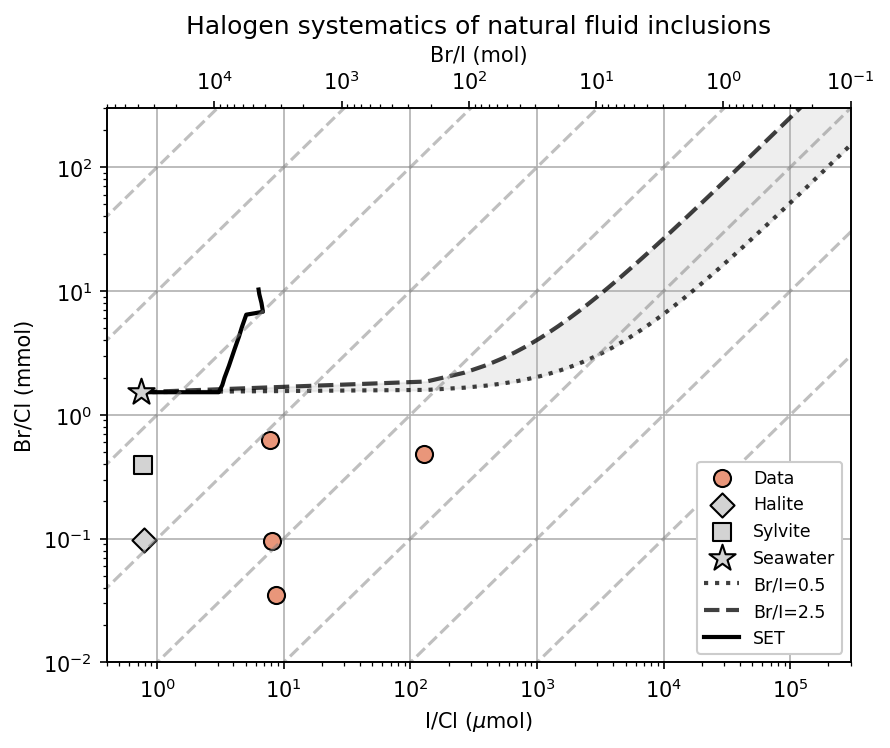

In [6]:
fig, ax = plt.subplots(dpi=150)
ax2 = ax.twiny()

ax.set_xscale("log")
ax2.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(4*10**(-1), 3*10**5)
ax.set_ylim(1*10**(-2), 3*10**2)
ax2.set_xlim(7*10**(4), 1*10**-1)
ax.grid()

ax.set_xlabel("I/Cl ($\\mu$mol)")
ax.set_ylabel("Br/Cl (mmol)")
ax2.set_xlabel("Br/I (mol)")
ax.set_title("Halogen systematics of natural fluid inclusions")

data_icl = create_iodine_chlorine_ratio()
data_brcl = create_bromine_chlorine_ratio()

data_icl = data_icl*10**6
data_brcl = data_brcl*10**3

data_halite = [0.788390, 0.098038]
data_sylvite = [0.774990, 0.392940]
data_seawater = [0.751910, 1.522500]

data_x_set = [0.75828, 1.5245, 2.3861, 3.0648, 3.2736, 3.4056, 3.6857, 4.0955, 4.4324, 4.6723, 5.0566, 5.9229,
              6.8467, 6.6686, 6.4101, 6.3262]
data_y_set = [1.522500, 1.522500, 1.522500, 1.522500, 1.7425, 1.9953, 2.4781, 3.4068, 4.289, 5.1147, 6.4391,
              6.6159, 6.7976, 7.9973, 9.4087, 10.275]

data_icl2 = np.linspace(data_seawater[0], 10**6, 7500)

a_lower = 0.5*10**(-3)
a_upper = 2.5*10**(-3)
a_upper2 = 2.5*10**(-3)
b = data_seawater[1]

x = data_icl[:len(data_brcl)]

ax.scatter(ratio_i_cl, ratio_br_cl, marker="o", s=67, color="darksalmon", edgecolor="black", label="Data")

ax.scatter(data_halite[0], data_halite[1], marker="D", s=67, color="lightgrey", edgecolor="black",
           label="Halite", zorder=2)
ax.scatter(data_sylvite[0], data_sylvite[1], marker="s", s=67, color="lightgrey", edgecolor="black",
           label="Sylvite", zorder=2)
ax.scatter(data_seawater[0], data_seawater[1], marker="*", s=175, color="lightgrey", edgecolor="black",
           label="Seawater", zorder=2)

ax.fill_between(data_icl2, a_upper*data_icl2 + b, a_lower*data_icl2 + b, color="0.75", alpha=0.25, zorder=0)
ax.plot(data_icl2, a_lower*data_icl2 + b, linestyle="dotted", color="black", linewidth=2, alpha=0.75, zorder=1,
        label="Br/I=0.5")
ax.plot(data_icl2, a_upper*data_icl2 + b, linestyle="dashed", color="black", linewidth=2, alpha=0.75, zorder=1,
        label="Br/I=2.5")

ax.plot(data_x_set, data_y_set, linestyle="solid", color="black", linewidth=2, alpha=1, zorder=1, label="SET")

ax.plot(data_icl, data_icl*10**(3), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(2), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(1), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(0), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(-1), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(-2), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(-3), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(-4), linestyle="dashed", color="grey", alpha=0.5)
ax.plot(data_icl, data_icl*10**(-5), linestyle="dashed", color="grey", alpha=0.5)

ax.set_axisbelow(True)

ax.legend(loc="lower right", fontsize="small", framealpha=1.0)

plt.draw()